# Resnet50

In [2]:
from keras.applications.resnet import ResNet50

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/train"
test_path = r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/val"

In [5]:
i_model = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

I0000 00:00:1751363513.639760      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751363513.640586      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
for layer in i_model.layers:
    layer.trainable = False

In [7]:
folders = glob(r'/kaggle/input/comsys/Comys_Hackathon5/Task_A/train/*')

In [10]:
x = Flatten()(i_model.output)
output = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=i_model.input, outputs=output)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1926 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r"/kaggle/input/comsys/Comys_Hackathon5/Task_A/val",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 422 images belonging to 2 classes.


In [17]:
from sklearn.utils.class_weight import compute_class_weight
y_train = training_set.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 3.1782178217821784, 1: 0.5933456561922366}


In [18]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=200,
  validation_steps=130,
  class_weight=class_weights_dict

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1751363935.484779     119 service.cc:148] XLA service 0x7924c80023d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751363935.486563     119 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751363935.486596     119 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751363937.194985     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/200 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.3125 - loss: 2.9656   

I0000 00:00:1751363943.346322     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 61/200 ━━━━━━━━━━━━━━━━━━━━ 1:36 696ms/step - accuracy: 0.5730 - loss: 2.8179

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 271ms/step - accuracy: 0.5872 - loss: 2.1134 - val_accuracy: 0.5829 - val_loss: 0.8293
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 156ms/step - accuracy: 0.6120 - loss: 1.0964 - val_accuracy: 0.7749 - val_loss: 0.4939
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 156ms/step - accuracy: 0.6442 - loss: 0.7609 - val_accuracy: 0.4787 - val_loss: 1.4285
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 162ms/step - accuracy: 0.6555 - loss: 1.2376 - val_accuracy: 0.7773 - val_loss: 0.5250
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.7094 - loss: 0.6613 - val_accuracy: 0.8270 - val_loss: 0.4892
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.6619 - loss: 1.1226 - val_accuracy: 0.7962 - val_loss: 0.5610
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 157ms/step - accuracy: 0.7025 - loss: 0.9046 - val_accuracy: 0.8341 - val_loss: 0.5212
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 156ms/step - accuracy: 0.6645 - loss: 1.0670 - val

In [19]:
model.save("gender_classification.h5")

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


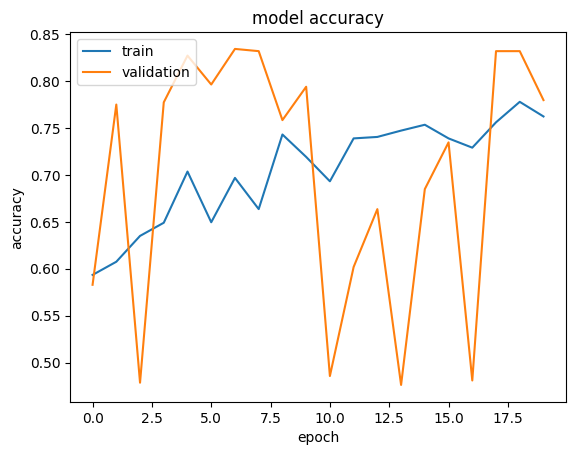

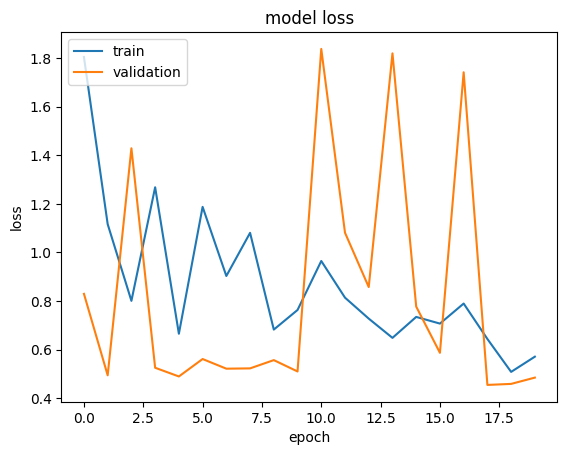

In [20]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()